# Session 7 - NumPy (First part - 70')
> A brief introduction to NumPy basic concepts. First, you will become familiar with NumPy's iconic "arrays" containers. You will learn how to manipulate them and some basic operations and aggregations. Finally, we will try to understand the difference between element-wise and broadcasting operations before introducing some tools for random number generation and refreshing a few linear algebra ideas.

> **Disclaimer**: These contents are based on the official [The absolute basics for beginners](https://numpy.org/doc/stable/user/absolute_beginners.html) from NumPy website.

## Outline
 * [What is NumPy?](#What-is-NumPy?)
   * [N-dimensional arrays](#N-dimensional-arrays)
   * [Array fundamentals](#Array-fundamentals)
 * [Array attributes](#Array-attributes)
 * [Creating arrays](#Creating-arrays)
 * [Sorting, concatenating and reversing arrays](#Sorting,-concatenating-and-reversing-arrays)
   * [Sorting](#Sorting)
   * [Concatenating](#Concatenating)
   * [Reversing](#Reversing)
 * [Reshaping and flattening arrays](#Reshaping-and-flattening-arrays)
   * [Reshaping](#Reshaping)
   * [Flattening](#Flattening) 
 * [Slicing and indexing arrays](#Slicing-and-indexing-arrays)
 * [Aggregating arrays and operating with arrays](#Aggregating-arrays-and-operating-with-arrays)
   * [Aggregating](#Aggregating)
   * [Operating](#Operating)
 * [Broadcasting](#Broadcasting)
 * [Extra concepts](#Extra-concepts)
   * [Generating random numbers](#Generating-random-numbers)
   * [Working with vectors and matrices](#Working-with-vectors-and-matrices)

This document is devised as a tool to enable your **self-learning process**. If you get stuck at some step or need any kind of help, please don't hesitate to raise your hand and ask for the teacher's guidance. Along it, you will find some **special cells**:

<div class="alert alert-block alert-success"><b>Practice:</b> Practice cells announce exercises that you should try during the current boot camp session. Usually, solutions are provided using hidden cells (look for the dot dot dot symbol "..." and click to unravel them and check that your try is correct).
</div>

<div class="alert alert-block alert-warning"><b>Extension:</b> Extension cells correspond to exercises (or links to contents) that are a bit more advanced. We recommend to try them after the current boot camp session.
</div>

<div class="alert alert-block alert-info"><b>Tip:</b> Tip cells just give some advice or complementary information.
</div>

<div class="alert alert-block alert-danger"><b>Caveat:</b> Caveat cells warn you about the most common pitfalls one founds when starts his/her path learning Python.

</div>

## What is NumPy?

[**NumPy**](https://numpy.org/) (**Num**erical **Py**thon) is an open source Python library that's widely used in science and engineering. NumPy contains multidimensional array data structures, such as the homogeneous, **N-dimensional array** (AKA `ndarray`), and a large library of functions that operate efficiently on these data structures. We usually load NumPy with the `np` alias:

In [3]:
# Load package with its corresponding alias
import numpy as np

Python lists (that we [already introduced](./02_Intro.ipynb)) are excellent, general-purpose containers. Lists can be "heterogeneous", meaning that they can store elements of a variety of types. Lists are quite fast when used to perform individual operations on a handful of elements. However, depending on the characteristics of the data and the types of operations that need to be performed, other containers like NumPy `ndarray` may be more appropriate.

By exploiting these characteristics, NumPy can improve speed, reduce memory consumption, and offer a high-level syntax for performing a variety of common processing tasks. NumPy shines when there are large quantities of "homogeneous" (same-type) data to be processed on the CPU.

### N-dimensional arrays

In computer programming, an array is a structure for storing and retrieving data. We often talk about an `ndarray` as if it were a grid in space, with each cell storing one element of the data. For instance, if each element of the data were a number, we might visualize a "one-dimensional" array like a list:

$$
\begin{aligned}
&\begin{array}{|c|c|c|c|}
\hline 1 & 5 & 2 & 0 \\ \hline
\end{array}
\end{aligned}
$$

A "two-dimensional" array would be like a table:

$$
\begin{aligned}
&\begin{array}{|c|c|c|c|}
\hline 1 & 5 & 2 & 0 \\ \hline
\hline 8 & 3 & 6 & 1 \\ \hline
\hline 1 & 7 & 2 & 9 \\ \hline
\end{array}
\end{aligned}
$$

A "three-dimensional" array would be like a set of tables, perhaps stacked as though they were printed on separate pages. In NumPy, this idea is generalized to an arbitrary number of dimensions, and so the fundamental array class is called `ndarray`: it represents an "N-dimensional array" or "ND".

Most NumPy arrays have some restrictions. For instance:

* All elements of the array must be of the same type of data.
* Once created, the total size of the array can't change.
* The shape must be "rectangular", not "jagged" (each row of a 2D array must have the same number of columns).

When these conditions are met, NumPy exploits these characteristics to make the array faster, more memory efficient, and more convenient to use than less restrictive data structures like lists (for the remainder of this document, we will use the word "array" to refer to an instance of `ndarray`).

### Array fundamentals

One way to initialize an array is using a pre-existing Python sequence, such a list `[]`:

In [ ]:
# Create 1D array from scratch
a = np.array([6, 5, 4, 3, 2, 1])

In [ ]:
# Check the array we just created
a

In [ ]:
# Check its data type
type(a)

We can access array individual elements as we would access list elements: using the integer index of the element within square brackets `[]`:

In [ ]:
# View its first (0) element
a[0]

Like Python built-in lists, arrays are mutable:

In [ ]:
# Modify the its first element
a[0] = 60

# Check the modified array
a

Also like the original list, Python slice notation can be used for indexing.

In [ ]:
# Slice from the 4th (3) element to the last element (:)
slice_a = a[3:]

# View the sliced array
slice_a

One major difference is that slice indexing of a list copies the elements into a new list, but slicing an array returns a **view**: an object that refers to the original array data. The original array can be (indirectly) mutated using the view:

In [ ]:
# Modify the 1st element of the array view we just created
slice_a[0] = 30

# Check the slice_a we just modified
print("Modified view of array 'a':\n", slice_a, "\n")

# Check the original array
print("Original array 'a':\n", a)

<div class="alert alert-block alert-danger"><b>Caveat:</b>

* Note that we end-up modifying the original array `a` by modifying its slice view `slice_a`. See [Copies and views](https://numpy.org/doc/stable/user/basics.copies.html#basics-copies-and-views) for a more comprehensive explanation of when array operations return views rather than copies.

</div>

Two- and higher-dimensional arrays can be initialized from nested Python sequences, such a list of lists `[ [], [], [] ]`:

In [ ]:
# Create a 2D array from scratch
array_b = np.array([ [12, 11, 10, 9], [8, 7, 6, 5], [4, 3, 2, 1] ])

# Create a list of lists from scratch
list_b = [ [12, 11, 10, 9], [8, 7, 6, 5], [4, 3, 2, 1] ]

# Print the array_b we just created
print("2D array 'array_b':\n", array_b, "\n")

# Print the list_b we just created
print("List of lists 'list_b':\n", list_b)

In NumPy, a dimension of an array is sometimes referred to as an "axis". This terminology may be useful to disambiguate between the dimensionality of an array and the dimensionality of the data represented by the array. For instance, the array `array_b` could represent **three points**, each lying within a **four-dimensional space**, but `array_b` has only **two "axes"**. This means that we only need two indices to access an individual element from the array:

In [ ]:
# Get the array 2nd element [1] along axis 1 and 3rd element [2] along axis 2
print(array_b[1][2], '\n')

# Get the list 2nd element [1] along "axis" 1 and 3rd element [2] along "axis" 2
print(list_b[1][2])

Note that this is the same syntax that we should use for a list of lists. Alternatively, you can also specify the index along each axis within a single set of square brackets, separated by commas:

In [ ]:
# Get the 2nd element [1] along axis 1 and 3rd element [2] along axis 2
print(array_b[1, 2])

However, this syntax doesn't works for list of lists:

In [ ]:
# (Trying to) get the 2nd element [1] along axis 1 and 3rd element [2] along axis 2
try:
    print(list_b[1, 2])
except TypeError:
    print("TypeError")

<div class="alert alert-block alert-success"><b>Practice 1:</b>

Check the different behavior when modifying list slices and array slices. We have prepared a testing list `list_x` and a testing array `array_x` for you:
    
1) Slice first four elements for `list_x` and `array_x`.

2) Modify second element of `list_slice_x` and `array_slice_x`. Overwrite the contents a assign the value `30`.

3) Check the original list `list_x` and the original array `array_x` after modifying the corresponding slices.

Un-comment and fill only those code lines with underscores `___`.

</div>

In [ ]:
# Create list and array from scratch
list_x = [2, 3, 5, 7, 11]
array_x = np.array([2, 3, 5, 7, 11])

# Slice first four elements for list and array
# list_slice_x = ___
# array_slice_x = ___

# Modify second element for list slice and array slice
# list_slice_x[___] = ___
# array_slice_x[___] = ___

# Check original list and array after slice modification
print("Original list 'list_x':\n", list_x, "\n")
print("Original array 'array_x':\n", array_x)

In [ ]:
# Create list and array from scratch
list_x = [2, 3, 5, 7, 11]
array_x = np.array([2, 3, 5, 7, 11])

# Slice first four elements for list and array
list_slice_x = list_x[:3]
array_slice_x = array_x[:3]

# Modify second element for list slice and array slice
list_slice_x[1] = 30
array_slice_x[1] = 30

# Check original list and array after slice modification
print("Original list 'list_x':\n", list_x, "\n")
print("Original array 'array_x':\n", array_x)

<div class="alert alert-block alert-success"><b>Practice 1 ends here.</b>

</div>

<div class="alert alert-block alert-info">
    
<b>Tip:</b> Here, the NumPy function `np.random.default_rng()` creates a NumPy random number generator object with a bound method `.random()` that allows you to generate an arbitrary amount (3 in the example) of random numbers between 0 and 1.
    
</div>

## Array attributes

This section covers the [`.ndim`](https://numpy.org/doc/stable/reference/generated/numpy.ndim.html#numpy.ndim), [`.shape`](https://numpy.org/doc/stable/reference/generated/numpy.shape.html#numpy.shape), [`.size`](https://numpy.org/doc/stable/reference/generated/numpy.size.html#numpy.size), and [`.dtype`]() attributes of an array.

The **number of dimensions** of an array is contained in the `.ndim` attribute:

In [ ]:
# Create 1D and 2D arrays from scratch
a = np.array([6, 5, 4, 3, 2, 1])
b = np.array([[12, 11, 10, 9], [8, 7, 6, 5], [4, 3, 2, 1]])

# Get the `.ndim` attribute for our 1D and 2D arrays
print(a.ndim)
print(b.ndim)

The **shape** of an array is a tuple of non-negative integers that specify the number of elements along each dimension. It can be accessed via the `.shape` attribute:

In [ ]:
# Get the `.shape` attribute for our 1D and 2D arrays
print(a.shape)
print(b.shape)

Note that the length of array's shape matches its number of dimensions:

In [ ]:
# Check if length of array's shape matches array number of dimensions
print(len(a.shape) == a.ndim)
print(len(b.shape) == b.ndim)

The total number of elements of an array is given by its `.size` attribute.

In [ ]:
# Get the `.size` attribute for our 1D and 2D arrays
print(a.size)
print(b.size)

Arrays are typically "homogeneous", meaning that they can only contain elements of one "data type". This **data type** is given its `.dtype` attribute.

In [ ]:
# Get the `.dtype` attribute for our 1D and 2D arrays
print(a.dtype)
print(b.dtype)

## Creating arrays

This section covers [`np.zeros()`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html#numpy.zeros), [`np.ones()`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html#numpy.ones), [`np.random.default_rng()`](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng), [`np.arange()`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange), [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy-linspace).

Besides creating an array from a sequence of elements, you can easily create an array filled with **ones**, **zeros** or **random numbers**:

In [ ]:
# Create an array filled with zeroes
print(np.ones(3))

# Create an array filled with ones
print(np.zeros(3))

# Create an array filled random numbers
print(np.random.default_rng().random(3))

![np_ones_zeros_random](pics\np_ones_zeros_random.png "np_ones_zeros_random")

Picture from "[*NumPy: the absolute basics for beginners*](https://numpy.org/doc/stable/user/absolute_beginners.html)".

<div class="alert alert-block alert-info">
    
<b>Tip:</b> Here, the NumPy function `np.random.default_rng()` creates a **NumPy random number generator object** with a bound method `.random()` that allows you to generate an arbitrary amount (3 in the example) of random numbers between 0 and 1.
    
</div>

You can also use `np.ones()`, `np.zeros()`, and `np.random.default_rng().random()` to create a 2D array if you give them a tuple defining its shape:

In [ ]:
# Create a 2D array filled with zeroes
print(np.ones((3, 2)), '\n')

# Create a 2D array filled with ones
print(np.zeros((3, 2)), '\n')

# Create a 2D array filled random numbers
print(np.random.default_rng().random((3, 2)))

![np_ones_zeros_matrix](pics\np_ones_zeros_matrix.png "np_ones_zeros_matrix")

Picture from "[*NumPy: the absolute basics for beginners*](https://numpy.org/doc/stable/user/absolute_beginners.html)".

In addition to ones, zeros or random numbers, you can also create an array with a range of numbers:

In [ ]:
# Create an array with a range of ten (FLOAT) elements
np.arange(10)

You can even create an array that contains a range of equispaced numbers. To do this, you should specify the first number (`start` parameter), the last number (`stop` parameter), and the step size (`step` parameter):

In [ ]:
# Create another array with a range of ten elements
np.arange(start=2, stop=22, step=2)

Note that how in this example, the last number (`stop=22`) has not been included in the array we just created (try `stop=23`). For this reason, sometimes is more intuitive to use `np.linspace()` instead of `np.arange()`. The function `np.linspace()` creates an array with a fixed number of elements (`num` parameter) that are evenly spaced in a specified interval (`start` and `stop` parameters, both included in the output array):

In [ ]:
# Create array with eleven elements spanning from -2.5 to +2.5
np.linspace(start=-2.5, stop=2.5, num=11)

## Sorting, concatenating and reversing arrays

This section covers [`np.sort()`](https://numpy.org/doc/stable/reference/generated/numpy.sort.html#numpy.sort), [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html#numpy-concatenate) and [`np.flip()`](https://numpy.org/doc/stable/reference/generated/numpy.flip.html#numpy.flip).

### Sorting

Sorting an array is simple with `np.sort()`. For example, you can quickly sort the elements in ascending order with:

In [ ]:
# Create a 1D array from scratch
a = np.array([7, 5, 7, 8, 1, 7])

# Sort the 1D array
np.sort(a)

When you have a 2D array, you can sort across two axes by using the `axis` parameter of the `np.sort()` function. For example, if we have this array:

In [ ]:
# Create a 2D array from scratch
b = np.array([[0, 7, 9, 7], [1, 7, 2, 8], [6, 4, 9, 3]])

# Show the 2D array
b

You could sort along the first (`0`) axis:

In [ ]:
# Sort the 2D array across the first axis (across rows)
array_b_RowSort = np.sort(b, axis=0)

# Show the sorted 2D array
array_b_RowSort

Or you could sort along the second (`1`) axis:

In [ ]:
# Sort the 2D array across the second axis (across columns)
array_b_ColSort = np.sort(b, axis=1)

# Show the sorted 2D array
array_b_ColSort

The default value of the `axis=` parameter is `-1`, meaning that, if we don't specify its value, `np.sort()` will order across the last (`-1`) axis (which, in our example, is the second (`1`) axis):

In [ ]:
# Sort the 2D array across the last axis (without specifying the axis param)
np.sort(b)

In [ ]:
# Sort the 2D array across the last axis (specifying the axis param)
np.sort(b, axis=-1)

### Concatenating

In addition, you can concatenate arrays with `np.concatenate()`:

In [ ]:
# Concatenate two 2D arrays
np.concatenate((array_b_RowSort, array_b_ColSort))

### Reversing

Finally, `np.flip()` allows you to reverse the contents of an array along an axis. To use `np.flip()`, you need to specify the array to be reversed, and the axis of along which your array should be reversed. If you begin with a 1D array like this one:

In [ ]:
# Create a 1D array from scratch
a = np.array([1, 2, 3, 4, 5, 6, 7, 8])

# Show the 1D array
a

You can reverse it with:

In [ ]:
# Flip the 1D array
np.flip(a)

Reversing 2D arrays with `np.flip()` works much the same way. If you start with this array:

In [ ]:
# Create a 2D array from scratch
b = np.array( [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]] )

# Show the 2D array
b

If you don't specify the axis, NumPy will reverse the array along all axes:

In [ ]:
# Flip the 2D array along all axes (without specifying the axis param)
np.flip(b)

You can easily reverse only the rows or only the columns specifying the axis param:

In [ ]:
# Flip the 2D array along rows (with the axis set at 0)
b_rowflip = np.flip(b, axis=0)

# Show the 2D array
print(b_rowflip)

In [ ]:
# Flip the 2D array along cols (with the axis set at 1)
b_colflip = np.flip(b, axis=1)

# Show the 2D array
print(b_colflip)

You can also reverse the contents of only one column or row. For example, you can reverse the contents of the row at index position 1 (the second row):

In [ ]:
# Flip only the 2nd row of the the 2D array...
b[1, :] = np.flip(b[1, :])
# ... and re-assign it as new 2nd row

# Show the 2D array
print(b)

Analogously, you can also reverse the column at index position 1 (the second column):

In [ ]:
# Flip only the 2nd row of the the 2D array...
b[:, 1] = np.flip(b[:, 1])
# ... and re-assign it as new 2nd row

# Show the 2D array
print(b)

## Reshaping and flattening arrays

This section covers [`.reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html#numpy.ndarray.reshape) (also [`np.reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html#numpy.reshape)), [`.flatten()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html#numpy.ndarray.flatten) and [`.ravel()`](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html#numpy.ravel).

### Reshaping

Using `.reshape()` (array method) or `np.reshape()` (NumPy function) will give a new shape to an existing array without changing the data. Just remember that when you use the reshape method, **the array you want to produce needs to have the same number of elements as the original array**.

In [ ]:
# Create a 1D array from scratch
a = np.arange(6)

# Show the 1D array
a

In [ ]:
# Reshape our 1D array into a 3x2 2D array
a.reshape(3, 2)

Alternatively, you can do the same using the `np.reshape()` NumPy function specifying its `shape=` parameter:

In [ ]:
# Reshape our 1D array into a 3x2 2D array
np.reshape(a, shape=(3, 2))

<div class="alert alert-block alert-info"><b>Tip:</b> Intuitively, the product of all "reshaping shapes" (in the example above, $3 \times 2$) must be equal to the number of elements of the array to be reshaped (in the example above, $6$).
</div>

### Flattening

By "flattening" we understand reshaping an ND-array to a 1D-array with shape $(S,)$, where $S$ is the size of the original ND-array. There are two popular methods to flatten an array: `.flatten()` and `.ravel()`. If you start with this array:

In [ ]:
# Create a 2D array from scratch
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

# Show the 2D array
print(a, '\n')

# Show the size of the flattened array
print(a.size)

You can use `.flatten()` to flatten your array into a 1D array.

In [ ]:
# Flatten a 2D array
a_flat = a.flatten()

# Show the flattened array
print(a_flat)

Note the size, the shape and the number of dimensions of the flattened array: 

In [ ]:
# Show the size of the flattened array
print(a_flat.size, '\n')

# Show the shape of the flattened array
print(a_flat.shape, '\n')

# Show the number of dimensions of the flattened array
print(a_flat.ndim)

Analogously with `.ravel()`: 

In [ ]:
# Ravel a 2D array
a_ravel = a.ravel()

# Show the ravelled array
print(a_ravel)

In [ ]:
# Show the size of the ravelled array
print(a_ravel.size, '\n')

# Show the shape of the ravelled array
print(a_ravel.shape, '\n')

# Show the number of dimensions of the ravelled array
print(a_ravel.ndim)

The primary difference between `.flatten()` and `.ravel()` is that the new array created using `ravel()` is actually a reference to the parent array (i.e., a "view", as we already have seen above). This means that any changes to the new array will affect the parent array as well. Since ravel does not create a copy, it's memory efficient.

## Slicing and indexing arrays

You can index and slice NumPy arrays in the same ways you can slice Python lists. Have a look to the [second part of Chapter 1](./02_Intro.ipynb) to check it out.

In [ ]:
# Create a 1D array from scratch
data = np.array([1, 2, 3])

# Show the 1D array
data

In [ ]:
# Print the 1st item (0) of our 1D array
print(data[0], '\n')

# Print the 2nd item (1) of our 1D array
print(data[1], '\n')

# Print the slice going from the 1st item (0, included) to the 3rd item (2, excluded) of our 1D array
print(data[0:2], '\n')

# Print the slice going from the 2nd item (1, included) to the last item ( , included) of our 1D array
print(data[1:], '\n')

# Print the slice going from penultimate item (-2, included) to the last item ( , included) of our 1D array
print(data[-2:])

![np_indexing](pics\np_indexing.png "np_indexing")

Picture from "[*NumPy: the absolute basics for beginners*](https://numpy.org/doc/stable/user/absolute_beginners.html)".

You may want to take a section of your array or specific array elements to use in further analysis or additional operations. To do that, you'll need to subset, slice, and/or index your arrays. If you want to select values from your array that fulfill certain conditions, it's straightforward with NumPy. For example, if you start with this array:

In [ ]:
# Create a 2D array from scratch
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

# Show the 2D array
a

You can easily print all of the values in the array that are less or equal than 5.

In [ ]:
# Ask which array elements are less-equal than 5
a <= 5

Now you can use this "boolean array" to pick up the array elements that are less or equal than 5: 

In [ ]:
# Ask which array elements are less-equal than 5, and store the boolean array
a_bool = a <= 5

# Use the boolean array to pick the array elements we want
a[a_bool]

<div class="alert alert-block alert-success"><b>Practice 2:</b>

Use array indexing and slicing to pick up only those array elements being divisible by 2 and 3 at the same time:
    
1) Create a "boolean array" called `a_bool_div2` indexing those array elements divisible by 2. 

2) Create a "boolean array" called `a_bool_div3` indexing those array elements divisible by 3. 

3) Use the "boolean arrays" `a_bool_div2` and `a_bool_div3` to pick up the elements being divisible by 2 and 3.

Un-comment and fill only those code lines with underscores `___`.

</div>

In [ ]:
# Create a 2D array from scratch
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

# Ask which array elements are divisible by 2, and store the boolean array
# a_bool_div2 = ___

# Ask which array elements are divisible by 3, and store the boolean array
# a_bool_div3 = ___

# Use a_bool_div2 and a_bool_div3 to pick the array elements we want
# print(a[___])

In [ ]:
# Create a 2D array from scratch
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

# Ask which array elements are divisible by 2, and store the boolean array
a_bool_div2 = a%2 == 0

# Ask which array elements are divisible by 3, and store the boolean array
a_bool_div3 = a%3 == 0

# Use a_bool_div2 and a_bool_div3 to pick the array elements we want
print(a[a_bool_div2 & a_bool_div3])

<div class="alert alert-block alert-success"><b>Practice 2 ends here.</b>

</div>

Slicing works analogously for 2D arrays:

In [ ]:
# Create a 2D array from scratch
data = np.array([[1, 2], [3, 4], [5, 6]])

# Show the 2D array
data

![np_create_matrix](pics\np_create_matrix.png "np_create_matrix")

Picture from "[*NumPy: the absolute basics for beginners*](https://numpy.org/doc/stable/user/absolute_beginners.html)".

In [ ]:
# Print the item at the 1st row (0) 2nd col (1) of our 2D array
print(data[0, 1], '\n')

# Print the rows from the 2nd (1) to the 4th (3, excluded) of our 2D array
print(data[1:3], '\n')

# Print the rows from the 1st (0) to the 3rd (2, excluded) of our 2D array
print(data[0:2, 0])
# But only the items of the 1st (0) col

![np_matrix_indexing](pics\np_matrix_indexing.png "np_matrix_indexing")

Picture from "[*NumPy: the absolute basics for beginners*](https://numpy.org/doc/stable/user/absolute_beginners.html)".

## Aggregating arrays and operating with arrays

This section covers some basic array **aggregation** methods/functions (mean, median, standard deviation, minimum, maximum...) and a few additional utilities with [`np.unique()`](https://numpy.org/doc/stable/reference/generated/numpy.unique.html#numpy.unique). Finally we will learn the arithmetic (element-wise) operations **addition**, **subtraction**, **multiplication** and **division**.

### Aggregating

Basic aggregating operations are simple with NumPy. If you want to find, for example, the sum of the elements in an array, you'd use the `.sum()` method. This works for 1D arrays, 2D arrays, and arrays in higher dimensions.

In [ ]:
# Create a 1D array from scratch
a = np.array([1, 2, 3, 4])

# Aggregate the array with the sum
a.sum()

As usual, you can use other array methods (like `.mean()`, `std()`, `.min()`, `.max()`...) or NumPy functions (like `np.mean()`, `np.median()`, `np.std()`, `np.min()`, `np.max()`...) to aggregate array elements:

In [ ]:
# Aggregate the array with methods (mean, std, min, max...)
print(a.mean())
print(a.std())
print(a.min())
print(a.max())

In [ ]:
# Aggregate the array with functions (mean, std, min, max...)
print(np.mean(a))
print(np.median(a))
print(np.std(a))
print(np.min(a))
print(np.max(a))

You can aggregate 2D arrays (across all axes) as simple as:

In [ ]:
# Create a 2D array from scratch
data = np.array([[1, 2], [3, 4], [5, 6]])

# Show the 2D array
data

In [ ]:
# Aggregate the 2D array with methods (max, min, sum...)
print(data.max())
print(data.min())
print(data.sum())

#### ![np_matrix_aggregation](pics\np_matrix_aggregation.png "np_matrix_aggregation")

Picture from "[*NumPy: the absolute basics for beginners*](https://numpy.org/doc/stable/user/absolute_beginners.html)".

You can also aggregate the values in a 2D array across columns or rows by using the `axis=` parameter. To illustrate this point, let's look at a slightly modified dataset:

In [ ]:
# Create a 2D array from scratch
data = np.array([[1, 2], [5, 3], [4, 6]])

# Show the 2D array
data

In [ ]:
# Aggregate 2D array across rows with the max
print(data.max(axis=0))

# Aggregate 2D array across cols with the max
print(data.max(axis=1))

![np_matrix_aggregation_row](pics\np_matrix_aggregation_row.png "np_matrix_aggregation_row")

Picture from "[*NumPy: the absolute basics for beginners*](https://numpy.org/doc/stable/user/absolute_beginners.html)".

You can find the unique elements in an array easily with `np.unique()`. For example, if you start with this array:

In [ ]:
# Create a 1D array from scratch
a = np.array([11, 11, 12, 13, 14, 15, 16, 17, 12, 13, 11, 14, 18, 19, 20])

You can use `np.unique()` to get the unique values in your array:

In [ ]:
# Get unique items in the 1D array
np.unique(a)

You can use the `return_index` argument in `np.unique()` to get the indices of unique values in a NumPy array (an array of first index positions of unique values in the array):

In [ ]:
# Get unique items in the 1D array along with their corresponding indices
tup_a_unique = np.unique(a, return_index=True)

# Print the tuple with unique items and indices of the 1D array
print(tup_a_unique)

Note that `np.unique()` with `return_index=True`, returned a tuple with two elements within: the first one is a new array with the **unique items** of the original array, and the second one is a new array with **the indices of the unique items** of the original array.

You can add the `return_counts=True` argument in `np.unique()` along with your array to get the frequency count of unique values in a NumPy array:

In [ ]:
# Get unique items in the 1D array along with their corresponding indices and frequencies
tup_a_unique = np.unique(a, return_index=True, return_counts=True)

# Print the tuple with unique items, indices and frequencies of the 1D array
print(tup_a_unique)

All this also works with 2D arrays! If you start with this array:

In [ ]:
# Create a 2D array from scratch
b = np.array([[1, 1, 3, 4], [5, 5, 7, 8], [9, 9, 11, 12], [1, 1, 3, 4]])

# Get unique items in the 2D array along with their corresponding indices and frequencies
tup_b_unique = np.unique(b, return_index=True, return_counts=True)

# Print the tuple with unique items, indices and frequencies of the 2D array
print(tup_b_unique)

Note that `np.unique()` implicitly flattens the 2D array before determining unique items, indices and frequencies.

Finally, if you want to get the unique rows or columns, make sure to pass the `axis=` argument. To find the unique rows, specify `axis=0` and for columns, specify `axis=1`:

In [ ]:
# Get unique rows in the 2D array along with their corresponding indices and frequencies
np.unique(b, axis=0, return_index=True, return_counts=True)
# Rows 0 and 3 are identical (1, 1, 3, 4)

In [ ]:
# Get unique cols in the 2D array along with their corresponding indices and frequencies
np.unique(b, axis=1, return_index=True, return_counts=True)
# Cols 0 and 1 are identical (1, 5, 9, 1)

### Operating

Finally, you can also perform basic arithmetic operations with arrays. Let's say, for example, that you've created two arrays, called `data` and `one`:

In [ ]:
# Create a couple 1D arrays from scratch
data = np.array([1, 2])
ones = np.ones(2, dtype=int)

# Show the two arrays we just created
print(data)
print(ones)

![np_array_dataones](pics\np_array_dataones.png "np_array_dataones")

Picture from "[*NumPy: the absolute basics for beginners*](https://numpy.org/doc/stable/user/absolute_beginners.html)".

You can add the arrays together with the plus sign `+`:

In [ ]:
# Sum the two arrays we just created 
data + ones

![np_data_plus_ones](pics\np_data_plus_ones.png "np_data_plus_ones")

Picture from "[*NumPy: the absolute basics for beginners*](https://numpy.org/doc/stable/user/absolute_beginners.html)".

You can also subtract `-`, multiple `*` and divide `/`:

In [ ]:
# Sum the two arrays we just created 
print(data - ones)

# Sum the two arrays we just created 
print(data * data)

# Sum the two arrays we just created 
print(data / data)

![np_sub_mult_divide](pics\np_sub_mult_divide.png "np_sub_mult_divide")

Picture from "[*NumPy: the absolute basics for beginners*](https://numpy.org/doc/stable/user/absolute_beginners.html)".

And very similarly for 2D arrays:

In [ ]:
# Create a couple 2D arrays from scratch
data = np.array([[1, 2], [3, 4]])
ones = np.array([[1, 1], [1, 1]])

# Show the two arrays we just created
print(data, '\n')
print(ones)

In [ ]:
# Sum the two 2D arrays we just created 
data + ones

![np_matrix_arithmetic](pics\np_matrix_arithmetic.png "np_matrix_arithmetic")

Picture from "[*NumPy: the absolute basics for beginners*](https://numpy.org/doc/stable/user/absolute_beginners.html)".

When we operate (`+`, `-`, `*`, `/`, etc..) two "same-shaped" arrays, the operation takes place "element-wise", but... what happens if the shapes of the operated arrays are different? Let's see...

In [ ]:
# Create a couple 2D or 1D arrays from scratch
data = np.array([[1, 2], [3, 4], [5, 6]])
ones = np.array([[1, 1]])

# Show the two arrays we just created
print(data, '\n')
print(ones)

In [ ]:
# Sum the two arrays we just created (2D and 1D)
data + ones

![np_matrix_broadcasting](pics\np_matrix_broadcasting.png "np_matrix_broadcasting")

Picture from "[*NumPy: the absolute basics for beginners*](https://numpy.org/doc/stable/user/absolute_beginners.html)".

Note that the array with the "smaller" shape (1, 2) automatically "broadens" to match the "bigger" shape of the other array (3, 2).

When NumPy has to perform and operation involving arrays of different shapes, internally "adapts" their shapes in order to being able to proceed with the operation. This is an example of a NumPy concept called **broadcasting**.

## Broadcasting

There are times when you might want to carry out an operation between an array and a single number (also called an operation between a vector and a scalar) or between arrays of two different sizes. For example, your array (we’ll call it “data”) might contain information about distance in miles but you want to convert the information to kilometers. You can perform this operation with:

In [ ]:
data = np.array([1.0, 2.0])

data * 1.6
array([1.6, 3.2])

![np_multiply_broadcasting](pics\np_multiply_broadcasting.png "np_multiply_broadcasting")

Picture from "[*NumPy: the absolute basics for beginners*](https://numpy.org/doc/stable/user/absolute_beginners.html)".

NumPy understands that the multiplication should happen **element-wise**. That concept is called broadcasting. Broadcasting is a mechanism that allows NumPy to perform operations on arrays of different shapes. The dimensions of your array must be compatible, for example, when the dimensions of both arrays are equal or when one of them is 1. If the dimensions are not compatible, you will get a ValueError.

## Extra concepts

We will end this NumPy tutorial with a couple of concepts that you will need to know (or refresh) for your upcoming lectures on *Machine Learning* and *Bayesian Statistics*. NumPy has an extensive toolbox to work with **random numbers** and **linear algebra**. Let's see some of it's capabilities!

### Generating random numbers

Random number generation is an important part of the configuration and evaluation of many numerical and machine learning algorithms. Whether you need to randomly initialize weights in an artificial neural network, split data into random sets, or randomly shuffle your dataset, being able to generate random numbers (actually, repeatable pseudo-random numbers) is essential.

With NumPy you can, for example, generate a 2 x 4 array of random integers between 0 and 4 with:

In [7]:
# Initiate a NumPy random number generator object (we will call "rgn")
rng = np.random.default_rng()

# Use the "rgn" to create a 2D array (2,4)-shaped filled with random integers (from 0 to 4)
rng.integers(5, size=(2, 4))

array([[1, 3, 4, 4],
       [2, 2, 1, 3]])

<div class="alert alert-block alert-info">
    
<b>Tip:</b> Remember that, the NumPy function `np.random.default_rng()` creates a **NumPy random number generator object** with many a bound methods. We have [already seen the `.random()` method](#Creating-arrays) and now we are seen the `.integers()` method.

    
</div>

Note that `np.random.default_rng().integers()`, generates random integers from 0 (included) to 5 (excluded). This means that in practice, you are creating random integers from 0 (included) to 4 (included). You can set the `endpoint=True` argument of the `.integers()` method to include the integer "endpoint":

In [9]:
# Use the "rgn" to create a (2,4)-shaped 2D array filled with random integers (from 0 to 5)
rng.integers(5, size=(2, 4), endpoint=True)

array([[1, 1, 4, 2],
       [5, 0, 1, 4]])

One crucial point when working with random numbers is being able to keep the reproducibility. Note what happens when we execute the same code two times independently: 

In [42]:
# 1ST EXECUTION

# Create a (3,3)-shaped 2D array filled with random integers (from -9 to +9)
np.random.default_rng().integers(9, size=(3, 3), endpoint=True)

array([[0, 1, 3],
       [9, 7, 1],
       [2, 0, 7]])

In [43]:
# 2ND EXECUTION

# Create a (3,3)-shaped 2D array filled with random integers (from -9 to +9)
np.random.default_rng().integers(9, size=(3, 3), endpoint=True)

array([[6, 3, 4],
       [4, 0, 3],
       [1, 2, 8]])

Both executions (most likely...) gave different (3,3)-shaped 2D arrays. It impossible working with random numbers in a reproducible way then? Of course not! Note how by "seeding" the random number generator you (and your collaborators) will be able to work with **reproducible random numbers**:

In [46]:
# 1ST EXECUTION

# Create a (3,3)-shaped 2D array filled with random integers (from -9 to +9)
np.random.default_rng(seed=1985).integers(9, size=(3, 3), endpoint=True)

array([[3, 2, 1],
       [4, 4, 5],
       [9, 0, 4]])

In [47]:
# 2ND EXECUTION

# Create a (3,3)-shaped 2D array filled with random integers (from -9 to +9)
np.random.default_rng(seed=1985).integers(9, size=(3, 3), endpoint=True)

array([[3, 2, 1],
       [4, 4, 5],
       [9, 0, 4]])

With this $1985$ seed, You should have gotten this result:

$$
\begin{aligned}
&\begin{array}{|c|c|c|}
\hline 3 & 2 & 1 \\ \hline
\hline 4 & 4 & 5 \\ \hline
\hline 9 & 0 & 4 \\ \hline
\end{array}
\end{aligned}
$$

NumPy random generation capabilities are very flexible and not only restricted to random integers. In fact, NumPy is able to generate random numbers of [almost any distribution](https://numpy.org/doc/stable/reference/random/generator.html#distributions):

In [120]:
# Uniform distribution
np.random.default_rng(seed=1985).uniform(low=-1, high=+1, size=15)

array([-0.57056628, -0.0441566 ,  0.16351838, -0.98634305, -0.24484155,
       -0.52444642, -0.91988755,  0.09719779, -0.03625638,  0.74664328,
        0.85450662,  0.53899881, -0.18443001,  0.67609393,  0.31651643])

In [121]:
# Normal distribution
np.random.default_rng(seed=1985).normal(loc=1, scale=1, size=15)

array([ 1.6199762 , -1.32428271, -0.01756443,  1.08798961,  1.03943459,
        2.24598975,  1.31097965,  1.39318156,  0.36955275,  0.83853863,
        1.51935602,  0.58821015,  1.51297798,  0.24874301, -0.57231598])

In [122]:
# Logistic distribution
np.random.default_rng(seed=1985).laplace(loc=1, scale=1, size=15)

array([ 0.15471214,  0.95483881,  1.17855074, -3.29350703,  0.71917232,
        0.25672428, -1.524324  ,  1.10225179,  0.96307003,  2.37295683,
        2.92762469,  1.77435465,  0.79613197,  2.12730171,  1.38055266])

Let's visualize these three distributions but let's try size 10k instead of 12:

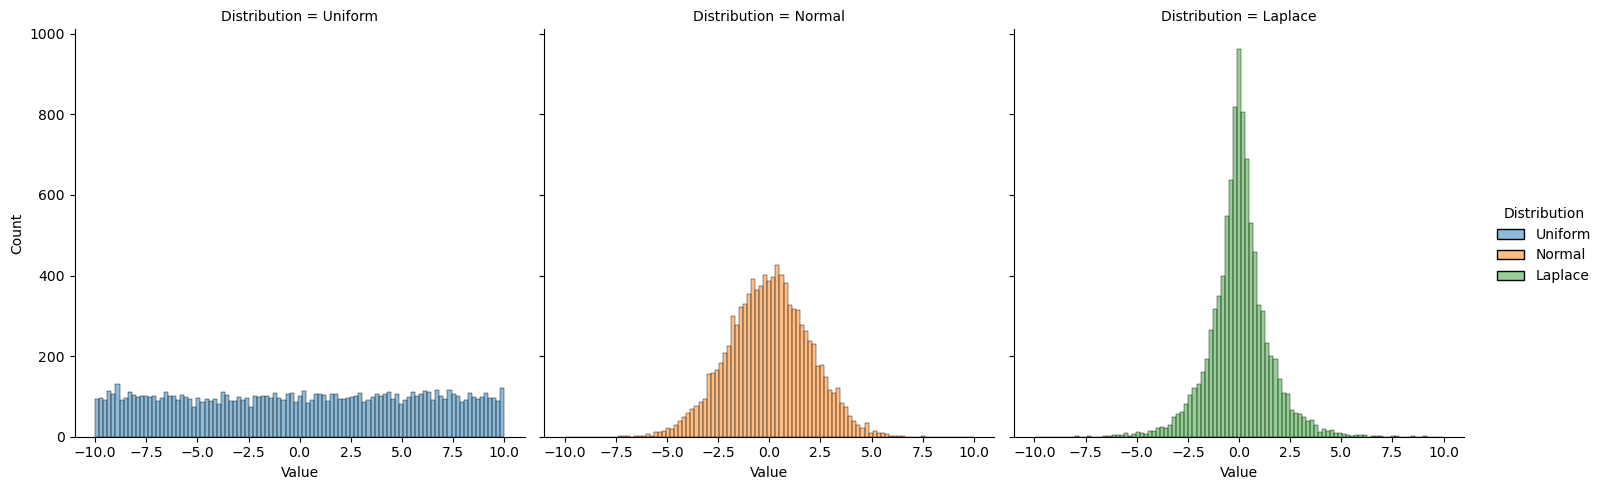

In [124]:
# Load packages with their corresponding aliases
import pandas as pd
import seaborn as sns

# Initiate a "seeded" random number generator
rnd_seed = np.random.default_rng(seed=1985)

# Create a DataFrame with three different random number distributions
df = pd.DataFrame(
    {
        'Uniform': rnd_seed.uniform(low=-10, high=+10, size=10000),
        'Normal': rnd_seed.normal(loc=0, scale=2, size=10000),
        'Laplace': rnd_seed.laplace(loc=0, scale=1, size=10000)
    }
)

# Melt the DataFrame we just created to enable nice visualization below
df_melt = pd.melt(
    frame=df,
    id_vars=None,
    value_vars=['Uniform', 'Normal', 'Laplace'],
    var_name='Distribution',
    value_name='Value'
)

# Visualize our three distributions
sns.displot(df_melt, x="Value", col="Distribution", hue="Distribution")

### Working with vectors and matrices

The element-wise array operations we have seen could be very useful but sometimes we need to work in formal algebraic terms, using vectors, matrices, tensors, etc... NumPy has a huge [linear algebra toolbox](https://numpy.org/doc/stable/reference/routines.linalg.html]).

For example, let's remember the definition of the [dot product](https://en.wikipedia.org/wiki/Dot_product) (or scalar product) between two vectors $\textbf{a}$ (dimension $1 \times n$) and $\textbf{b}$ (dimension $n \times 1$):

\begin{equation}
\textbf{a} \cdot \textbf{b} = \sum_{i=1}^{n} a_i b_i = a_1 b_1 + a_2 b_2 + \dots + a_n b_n
\end{equation} ,

where $n$ is the dimension of the vector space. If we would like to compute the dot product of two vectors $\textbf{a}$ (dimension $1 \times 3$) and $\textbf{b}$ (dimension $3 \times 1$) with NumPy, we should use [`np.dot()`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html):

In [148]:
# Initiate a "seeded" random number generator
rnd_seed = np.random.default_rng(seed=1985)

# Create a random vector a
a = rnd_seed.integers(9, size=(3, ))
print("a =", a, "\n")

# Create a random vector b
b = rnd_seed.integers(9, size=(3, ))
print("b =", b, "\n")

# Compute the dot product of our two random vectors a·b
np.dot(a, b)

a = [3 1 1] 

b = [4 3 5] 



np.int64(20)

Which is the same outcome obtained we the dot product definition:

\begin{equation}
\textbf{a} \cdot \textbf{b} = \begin{pmatrix} 3 & 1 & 1 \end{pmatrix} \cdot \begin{pmatrix} 4 \\ 3 \\ 5 \\ \end{pmatrix} = 3 \cdot 4 + 1 \cdot 3 + 1 \cdot 5 = 12 + 3 + 5 = 20
\end{equation}

<div class="alert alert-block alert-info">
    
<b>Tip:</b> Remember that, the dot product between two vectors can only be defined if the number of columns of the first vector matches the number of rows of the second vector: $(1 \times n) \cdot (n \times 1)$.

</div>

Similarly, let's remember the definition of the product between two matrices $\textbf{A}$ (dimension $m \times n$) and $\textbf{B}$ (dimension $n \times p$):

\begin{equation}
\textbf{A} \cdot \textbf{B} = \textbf{C}
\end{equation}

\begin{equation}
 \begin{pmatrix}
 a_{11} & a_{12} & \cdots & a_{1n} \\
 a_{21} & a_{22} & \cdots & a_{2n} \\
 \vdots & \vdots & \ddots & \vdots \\
 a_{m1} & a_{m2} & \cdots & a_{mn} \\
\end{pmatrix} \cdot \begin{pmatrix}
 b_{11} & b_{12} & \cdots & b_{1p} \\
 b_{21} & b_{22} & \cdots & b_{2p} \\
 \vdots & \vdots & \ddots & \vdots \\
 b_{n1} & b_{n2} & \cdots & b_{np} \\
\end{pmatrix} = \begin{pmatrix}
 c_{11} & c_{12} & \cdots & c_{1p} \\
 c_{21} & c_{22} & \cdots & c_{2p} \\
 \vdots & \vdots & \ddots & \vdots \\
 c_{m1} & c_{m2} & \cdots & c_{mp} \\
\end{pmatrix}
\end{equation}

Where the $c_{ij}$ element of the $\textbf{C}$ matrix is given by the dot product of the $i$<sup>th</sup> row of $\textbf{A}$ and the $j$<sup>th</sup> column of $\textbf{B}$:

\begin{equation}
c_{ij} = \sum_{k=1}^n a_{ik} b_{kj} = a_{i1} b_{1j} + a_{i2} b_{2j} + \cdots + a_{in} b_{nj} 
\end{equation}

if we would like to compute the dot product of two matrices $\textbf{A}$ (dimension $3 \times 2$) and $\textbf{B}$ (dimension $2 \times 3$) with NumPy, we should use the same `np.dot()` NumPy fucntion:

In [154]:
# Initiate a "seeded" random number generator
rnd_seed = np.random.default_rng(seed=1985)

# Create a random vector a
A = rnd_seed.integers(9, size=(3, 2))
print("A = \n", A, "\n")

# Create a random vector b
B = rnd_seed.integers(9, size=(2, 3))
print("B = \n", B, "\n")

# Compute the dot product of our two random matrices A·B
np.dot(A, B)

A = 
 [[3 1]
 [1 4]
 [3 5]] 

B = 
 [[8 0 4]
 [3 0 2]] 



array([[27,  0, 14],
       [20,  0, 12],
       [39,  0, 22]])

Which is the same outcome obtained with the matrix product definition (we will check only the $c_{11}$ element of the $\textbf{C}$ matrix for simplicity):

\begin{equation}
c_{11} = \sum_{k=1}^2 a_{1k} b_{k1} = a_{11} \cdot b_{11} + a_{12} \cdot b_{21} = 3 \cdot 8 + 1 \cdot 3 = 24 + 3 = 27
\end{equation}

<div class="alert alert-block alert-info">
    
<b>Tip:</b> Do you realize that the the dot product between two vectors could be alternatively be seen as a particular case of matrix product? In fact, the NumPy code to "multiply" two vectors or two matrices is exactly the same: `np.dot(A, B)`. Similarly to what we have seen for vectors, the product between two matrices can only be defined if the number of columns of the first matrix matches the number of rows of the second matrix: $(m \times n) \cdot (n \times p)$. If the dimensions of the multiplying matrices are $(m \times n)$ and $(n \times p)$, the product matrix will have dimension $(m \times p)$.

</div>

A more abbreviate syntax to get matrix products is with the `@` operator:

In [161]:
# Compute the dot product of our two random vectors a·b
print("a·b =\n", a @ b, '\n')

# Compute the dot product of our two random matrices A·B
print("A·B =\n", A @ B, '\n')

a·b =
 20 

A·B =
 [[27  0 14]
 [20  0 12]
 [39  0 22]] 



Finally, to transpose a matrix (or a vector) you should use the `.transpose()` method or its shortened form `.T`:

To aggregate the rows or the columns in a 2D array, you would specify the desired axis first. If you start with this array:

In [171]:
# Print our random matrix A
print(a, '\n')

# Transpose and print our random matrix A
print(A.transpose(), '\n')

# Print our random matrix A
print(B, '\n')

# Transpose and print our random matrix A
print(B.T)

[3 1 1] 

[[3 1 3]
 [1 4 5]] 

[[8 0 4]
 [3 0 2]] 

[[8 3]
 [0 0]
 [4 2]]


In [ ]:
# Create a 2D array from scratch
b = np.array([[12, 11, 10, 9], [8, 7, 6, 5], [4, 3, 2, 1]])

# Show the 2D array we just created
print(b)

For example, you can sum over the axis of rows with:

In [ ]:
# Aggregate array rows with the sum 
print(b.sum(axis=0))

Or over the axis of columns with: 

In [ ]:
# Aggregate array rows with the sum
print(b.sum(axis=1))